### Comments
***This problem can be solved by using Dynamic programing with backtracking.***

The keys to this problem lies in:

* The recurisive definition is one of subtraction but the way I used it was to add up. Its just easier describing it that way.

```
defintions 

def 1: f(x) = {f(x - i) - j}

conditions:

1: x - i - j < 0

2: 0 <=  i <= 9

3: i <   j <= 9

# End condtion
4: x - i - j == 0

```

* Basically we keep adding to the number either until it adds to the target number or substract from the target number till we reach 0. Keeping track of the elements.

* **Easier to imagine it like a tree with every possible number where if the root is i then it will have 9 - i children and its children will have 9 - childValue always greater as we dont wont combinations.**

Edge Cases:

* if we take max sum we can make by taking from 9 till 9-k and its still less than n we can just return []

```
uLimit = sum([i for i in range(9, 9 - k - 1, -1)])
```


**The main thing when applying backtracking is:**

* Have a standard DP solution.
```
def sumUp(self, curr, total, target):
    if total+curr == target:
        return total+curr
    elif(total+ curr> target):
        return -1
    else:
        ans = []
        for i in range(curr+1,9):
            ans.append(self.sumUp(i,total+curr,target) )  

```

* Create a function to act as the driver. This is where the we force our DP soltion to find all possible answers instead of one.
```
    ans = []
    for i in range(1, 10):
        ans.append(self.sumUp(i,total+curr,target) )
```

* Leave no side effects.
```
    def findCombin(self, curr, total, used: set, k, target):

        if (total + curr) == target and k == len(used) + 1:
            return list(used) + [curr]

        if total + curr > target or len(used) + 1 > k:
            return None

        # 1.1 Added current number to the set 
        used.add(curr)
        ans = []
        for i in range(curr + 1, 10):
            if i not in used:

                # 1.2 Never really changed the total just added it on to the child call.
                if val := self.findCombin(i, total + curr, used, k, target):
                    if type(val[0]) is list:
                        ans.extend(val)
                    else:
                        ans.append(val)
        # 1.1 Removed current number to the set 
        used.remove(curr)
        return ans
```


### Complexity:

***Time***: O(K * C(9,K))

***Space***:O(K) 

* Just for the stack. Not the answer array.

In [ ]:
class Solution:
    def findCombin(self, curr, total, used: set, k, target):
        if (total + curr) == target and k == len(used) + 1:
            return list(used) + [curr]

        if total + curr > target or len(used) + 1 > k:
            return None

        used.add(curr)
        ans = []
        for i in range(curr + 1, 10):
            if i not in used:
                if val := self.findCombin(i, total + curr, used, k, target):
                    if type(val[0]) is list:
                        ans.extend(val)
                    else:
                        ans.append(val)
        used.remove(curr)
        return ans

    def combinationSum3(self, k: int, n: int) -> list[list[int]]:
        uLimit = sum([i for i in range(9, 9 - k - 1, -1)])

        if n > uLimit:
            return []
        ans = []
        for i in range(1, 10):
            if val := self.findCombin(i, 0, set(), k, n):
                if type(val[0]) is list:
                    ans.extend(val)
                else:
                    ans.append(val)
        return ans
    
s = Solution()


# Example 1:

# Input: k = 3, n = 7
# Output: [[1,2,4]]
# Explanation:
# 1 + 2 + 4 = 7
# There are no other valid combinations.

print(s.combinationSum3(3, 7))
# Example 2:

# Input: k = 3, n = 9
# Output: [[1,2,6],[1,3,5],[2,3,4]]
# Explanation:
# 1 + 2 + 6 = 9
# 1 + 3 + 5 = 9
# 2 + 3 + 4 = 9
# There are no other valid combinations.
print(s.combinationSum3(3, 9))
# Example 3:

# Input: k = 4, n = 1
# Output: []
# Explanation: There are no valid combinations.
# Using 4 different numbers in the range [1,9], the smallest sum we can get is 1+2+3+4 = 10 and since 10 > 1, there are no valid combination.
print(s.combinationSum3(4, 1))

# [[1,5],[2,4]]
print(s.combinationSum3(2, 6))

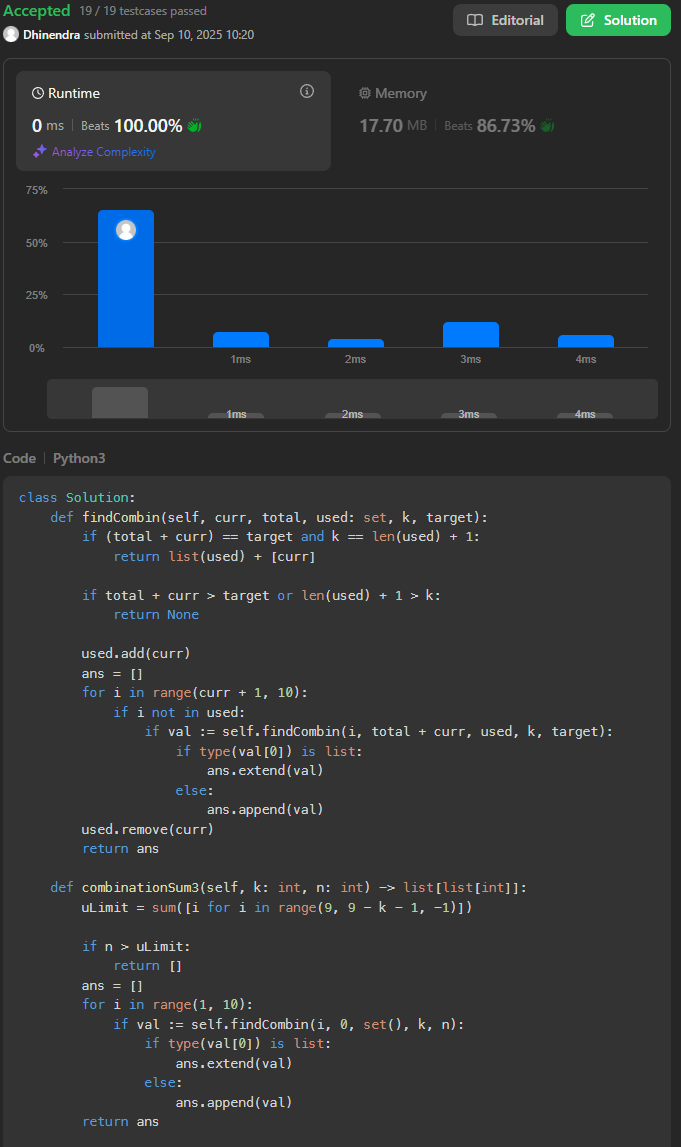

### Community References:

* In this solution the substraction approach is used.
* Since we are driving forward we dont need a set as no repeats will happen.


```
class Solution:
    def combinationSum3(self, k: int, n: int) -> List[List[int]]:
        results = []

        def backtrack(remain, comb, next_start):
            if remain == 0 and len(comb) == k:
                # make a copy of current combination
                # Otherwise the combination would be reverted in other branch of backtracking.
                results.append(list(comb))
                return
            elif remain < 0 or len(comb) == k:
                # exceed the scope, no need to explore further.
                return

            # Iterate through the reduced list of candidates.
            for i in range(next_start, 9):
                comb.append(i + 1)
                backtrack(remain - i - 1, comb, i + 1)
                # backtrack the current choice
                comb.pop()

        backtrack(n, [], 0)

        return results

```